In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/diet_data/cleaned_data.csv',low_memory=False)


In [ ]:
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,24,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"c(""Mix everything together and bring to a boil..."


In [2]:
df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeInstructions'],
      dtype='object')

In [3]:
df = df.drop(columns=['RecipeId','AuthorId', 'AuthorName', 'CookTime', 'PrepTime','TotalTime', 'DatePublished', 'Images','RecipeIngredientQuantities','AggregatedRating', 'ReviewCount','SaturatedFatContent','RecipeServings', 'RecipeInstructions'])  # Specify 'columns' argument to drop a column

In [4]:
df.columns

Index(['Name', 'Description', 'RecipeCategory', 'Keywords',
       'RecipeIngredientParts', 'Calories', 'FatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent'],
      dtype='object')

In [5]:
df.shape

(522518, 13)

In [6]:
df.isnull().sum()

,0
Name,0
Description,0
RecipeCategory,0
Keywords,0
RecipeIngredientParts,0
Calories,0
FatContent,0
CholesterolContent,1
SodiumContent,1
CarbohydrateContent,1


In [7]:
df.columns

Index(['Name', 'Description', 'RecipeCategory', 'Keywords',
       'RecipeIngredientParts', 'Calories', 'FatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent'],
      dtype='object')

In [8]:
# Replace spaces or empty strings with NaN in the entire DataFrame
import numpy as np
df.replace(to_replace=r'^\s*$', value=np.nan, regex=True, inplace=True)

In [9]:
from sklearn.impute import SimpleImputer
# Impute numerical columns
num_imputer = SimpleImputer(strategy='most_frequent')  # Or 'median' or 'most_frequent'
df[['FatContent','CholesterolContent','SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent','ProteinContent']] = num_imputer.fit_transform(df[['FatContent','CholesterolContent','SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent','ProteinContent']])

In [10]:
df.isnull().sum()

,0
Name,0
Description,0
RecipeCategory,0
Keywords,0
RecipeIngredientParts,0
Calories,0
FatContent,0
CholesterolContent,0
SodiumContent,0
CarbohydrateContent,0


In [11]:
#finding duplicates
df.duplicated().sum()

406

In [12]:
print(f"Number of rows before removing duplicates: {df.shape[0]}")

Number of rows before removing duplicates: 522518


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
print(f"Number of rows before removing duplicates: {df.shape[0]}")

Number of rows before removing duplicates: 522112


In [15]:
df.describe()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
count,522112,522112,522112,522112,522112,522112,522112,522112.0,522112.0,522112,522112.0,522112.0,522112.0
unique,438187,492836,313,216571,497121,30139,4523,9803.0,40455.0,8103,1067.0,6008.0,2581.0
top,Banana Bread,Make and share this Banana Bread recipe from F...,Dessert,"""Easy""",character(0),0,0,0.0,0.0,0,0.0,0.0,0.0
freq,186,101,62764,29550,2219,3109,11337,110304.0,3028.0,5688,26981.0,11795.0,8402.0


In [16]:
# Replace 0 and blank spaces with a specified value (e.g., NaN
df.replace([0, ''], pd.NA, inplace=True)




In [17]:
# Replace 0 and blank spaces with a specified value (e.g., NaN
df.replace([0, ''], pd.NA, inplace=True)

In [18]:
# Count the number of NaN values in each column
na_counts = df.isna().sum()

# Convert the Series to a DataFrame for better readability
na_counts_data = na_counts.reset_index()
na_counts_data.columns = ['Column', 'NA Count']

# Display the result
print(na_counts_data)

                   Column  NA Count
0                    Name         0
1             Description         0
2          RecipeCategory         0
3                Keywords         0
4   RecipeIngredientParts         0
5                Calories         0
6              FatContent         0
7      CholesterolContent    110304
8           SodiumContent      3028
9     CarbohydrateContent         0
10           FiberContent     26981
11           SugarContent     11795
12         ProteinContent      8402


In [19]:
# Drop rows that contain any NaN values
df.dropna(inplace=True)

In [20]:
# Count the number of NaN values in each column
na_counts = df.isna().sum()

# Convert the Series to a DataFrame for better readability
na_counts_data = na_counts.reset_index()
na_counts_data.columns = ['Column', 'NA Count']

# Display the result
print(na_counts_data)

                   Column  NA Count
0                    Name         0
1             Description         0
2          RecipeCategory         0
3                Keywords         0
4   RecipeIngredientParts         0
5                Calories         0
6              FatContent         0
7      CholesterolContent         0
8           SodiumContent         0
9     CarbohydrateContent         0
10           FiberContent         0
11           SugarContent         0
12         ProteinContent         0


In [21]:
df.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4
5,Best Blackbottom Pie,Make and share this Best Blackbottom Pie recip...,Pie,"c(""Dessert"", ""Weeknight"", ""Stove Top"", ""< 4 Ho...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",437.9,19.3,94.3,267.6,58,1.8,42.5,7.0
6,Warm Chicken A La King,I copied this one out of a friend's book so ma...,Chicken,"c(""Poultry"", ""Meat"", ""< 60 Mins"")","c(""chicken"", ""butter"", ""flour"", ""milk"", ""celer...",895.5,66.8,405.8,557.2,29.1,3.1,5.0,45.3
7,Buttermilk Pie With Gingersnap Crumb Crust,Make and share this Buttermilk Pie With Ginger...,Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228,7.1,24.5,281.8,37.5,0.5,24.7,4.2


In [ ]:
#save the cleaned data to drive
df.to_csv('/content/drive/MyDrive/diet_data/halfData.csv', index=False)

In [ ]:
df.head(5)


,Name,Description,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4
5,Best Blackbottom Pie,Make and share this Best Blackbottom Pie recip...,Pie,"c(""Dessert"", ""Weeknight"", ""Stove Top"", ""< 4 Ho...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",437.9,19.3,94.3,267.6,58,1.8,42.5,7.0
6,Warm Chicken A La King,I copied this one out of a friend's book so ma...,Chicken,"c(""Poultry"", ""Meat"", ""< 60 Mins"")","c(""chicken"", ""butter"", ""flour"", ""milk"", ""celer...",895.5,66.8,405.8,557.2,29.1,3.1,5.0,45.3
7,Buttermilk Pie With Gingersnap Crumb Crust,Make and share this Buttermilk Pie With Ginger...,Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228,7.1,24.5,281.8,37.5,0.5,24.7,4.2


In [23]:
df.shape

(392658, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392658 entries, 0 to 522517
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Name                   392658 non-null  object
 1   Description            392658 non-null  object
 2   RecipeCategory         392658 non-null  object
 3   Keywords               392658 non-null  object
 4   RecipeIngredientParts  392658 non-null  object
 5   Calories               392658 non-null  object
 6   FatContent             392658 non-null  object
 7   CholesterolContent     392658 non-null  object
 8   SodiumContent          392658 non-null  object
 9   CarbohydrateContent    392658 non-null  object
 10  FiberContent           392658 non-null  object
 11  SugarContent           392658 non-null  object
 12  ProteinContent         392658 non-null  object
dtypes: object(13)
memory usage: 41.9+ MB


next start from here

In [24]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/diet_data/halfData.csv')

In [ ]:
import pandas as pd
import numpy as np

# Define the nutrient limits (max values)
max_Calories = 3000
max_daily_fat = 100
max_daily_Cholesterol = 300
max_daily_Sodium = 2300
max_daily_Carbohydrate = 325
max_daily_Fiber = 40
max_daily_Sugar = 40
max_daily_Protein = 185

# Define ranges for each nutrient (using percentiles of max values)
nutrient_ranges = {
    'Calories': [0, max_Calories * 0.1, max_Calories * 0.2, max_Calories * 0.5, max_Calories],
    'FatContent': [0, max_daily_fat * 0.1, max_daily_fat * 0.2, max_daily_fat * 0.5, max_daily_fat],
    'CholesterolContent': [0, max_daily_Cholesterol * 0.1, max_daily_Cholesterol * 0.2, max_daily_Cholesterol * 0.5, max_daily_Cholesterol],
    'SodiumContent': [0, max_daily_Sodium * 0.1, max_daily_Sodium * 0.2, max_daily_Sodium * 0.5, max_daily_Sodium],
    'CarbohydrateContent': [0, max_daily_Carbohydrate * 0.1, max_daily_Carbohydrate * 0.2, max_daily_Carbohydrate * 0.5, max_daily_Carbohydrate],
    'FiberContent': [0, max_daily_Fiber * 0.1, max_daily_Fiber * 0.2, max_daily_Fiber * 0.5, max_daily_Fiber],
    'SugarContent': [0, max_daily_Sugar * 0.1, max_daily_Sugar * 0.2, max_daily_Sugar * 0.5, max_daily_Sugar],
    'ProteinContent': [0, max_daily_Protein * 0.1, max_daily_Protein * 0.2, max_daily_Protein * 0.5, max_daily_Protein],
}

# Labels for ranges
range_labels = ['Low', 'Medium', 'High', 'Very High']

# Function to apply ranges
def apply_range(value, bins, labels):
    for i in range(len(bins) - 1):
        if bins[i] <= value < bins[i + 1]:
            return labels[i]
    return 'Unknown'  # Return 'Unknown' if value is outside the expected range

# Load your DataFrame (ensure this is defined somewhere in your actual code)
# df = pd.read_csv('path_to_your_dataframe.csv')

# Apply ranges to all nutrient columns and replace nutrient values
for nutrient, bins in nutrient_ranges.items():
    df[nutrient] = df[nutrient].apply(lambda x: apply_range(x, bins, range_labels))

# Create a mapping from categorical to numerical values
range_to_numeric = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4, 'Unknown': 0}

# Convert the categorical ranges to numerical values directly in the nutrient columns
for nutrient in nutrient_ranges.keys():
    df[nutrient] = df[nutrient].map(range_to_numeric)

# Display the dataframe with the numerical ranges
print(df.head())

# Save the updated dataset with numerical ranges
df.to_csv('recipes_data_with_numerical_ranges.csv', index=False)


                                         Name  \
0           Low-Fat Berry Blue Frozen Dessert   
1                                     Biryani   
2                        Best Blackbottom Pie   
3                      Warm Chicken A La King   
4  Buttermilk Pie With Gingersnap Crumb Crust   

                                         Description   RecipeCategory  \
0  Make and share this Low-Fat Berry Blue Frozen ...  Frozen Desserts   
1  Make and share this Biryani recipe from Food.com.   Chicken Breast   
2  Make and share this Best Blackbottom Pie recip...              Pie   
3  I copied this one out of a friend's book so ma...          Chicken   
4  Make and share this Buttermilk Pie With Ginger...              Pie   

                                            Keywords  \
0  c("Dessert", "Low Protein", "Low Cholesterol",...   
1  c("Chicken Thigh & Leg", "Chicken", "Poultry",...   
2  c("Dessert", "Weeknight", "Stove Top", "< 4 Ho...   
3                  c("Poultry", "Meat", "<

In [25]:
df.shape

(369216, 13)

In [26]:
df.head(13)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4
2,Best Blackbottom Pie,Make and share this Best Blackbottom Pie recip...,Pie,"c(""Dessert"", ""Weeknight"", ""Stove Top"", ""< 4 Ho...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",437.9,19.3,94.3,267.6,58.0,1.8,42.5,7.0
3,Warm Chicken A La King,I copied this one out of a friend's book so ma...,Chicken,"c(""Poultry"", ""Meat"", ""< 60 Mins"")","c(""chicken"", ""butter"", ""flour"", ""milk"", ""celer...",895.5,66.8,405.8,557.2,29.1,3.1,5.0,45.3
4,Buttermilk Pie With Gingersnap Crumb Crust,Make and share this Buttermilk Pie With Ginger...,Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,24.5,281.8,37.5,0.5,24.7,4.2
5,Butter Pecan Cookies,Make and share this Butter Pecan Cookies recip...,Dessert,"c(""Cookie & Brownie"", ""Fruit"", ""Nuts"", ""Weekni...","c(""butter"", ""brown sugar"", ""granulated sugar"",...",69.0,5.6,6.3,15.0,4.5,0.6,1.6,0.8
6,Boston Cream Pie,Make and share this Boston Cream Pie recipe fr...,Pie,"c(""Dessert"", ""Weeknight"", ""Oven"", ""< 4 Hours"")","c(""margarine"", ""cake flour"", ""baking powder"", ...",688.2,36.4,105.9,722.3,84.0,1.6,46.2,8.8
7,Chicken Breasts Lombardi,Make and share this Chicken Breasts Lombardi r...,Chicken Breast,"c(""Chicken"", ""Poultry"", ""Meat"", ""European"", ""V...","c(""fresh mushrooms"", ""butter"", ""boneless skinl...",627.7,24.9,203.0,848.9,13.7,0.6,2.0,57.9
8,Biscotti Di Prato,Make and share this Biscotti Di Prato recipe f...,Dessert,"c(""Cookie & Brownie"", ""European"", ""Weeknight"",...","c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,16.6,23.5,14.5,0.8,7.3,2.3
9,Jimmy G's Carrot Cake,Make and share this Jimmy G's Carrot Cake reci...,Dessert,"c(""Pineapple"", ""Tropical Fruits"", ""Fruit"", ""We...","c(""all-purpose flour"", ""sugar"", ""baking powder...",372.9,10.6,62.0,190.0,66.2,3.4,40.9,6.6


In [27]:
# Count the number of NaN values in each column
na_counts = df.isna().sum()

# Convert the Series to a DataFrame for better readability
na_counts_data = na_counts.reset_index()
na_counts_data.columns = ['Column', '0']

# Display the result
print(na_counts_data)

                   Column  0
0                    Name  0
1             Description  0
2          RecipeCategory  0
3                Keywords  0
4   RecipeIngredientParts  0
5                Calories  0
6              FatContent  0
7      CholesterolContent  0
8           SodiumContent  0
9     CarbohydrateContent  0
10           FiberContent  0
11           SugarContent  0
12         ProteinContent  0


In [28]:
df.columns

Index(['Name', 'Description', 'RecipeCategory', 'Keywords',
       'RecipeIngredientParts', 'Calories', 'FatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent'],
      dtype='object')

In [29]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df'
# Replace 0 values with NaN
df.replace(0, np.nan, inplace=True)

# To verify the changes
print(df.head())


                                         Name  \
0           Low-Fat Berry Blue Frozen Dessert   
1                                     Biryani   
2                        Best Blackbottom Pie   
3                      Warm Chicken A La King   
4  Buttermilk Pie With Gingersnap Crumb Crust   

                                         Description   RecipeCategory  \
0  Make and share this Low-Fat Berry Blue Frozen ...  Frozen Desserts   
1  Make and share this Biryani recipe from Food.com.   Chicken Breast   
2  Make and share this Best Blackbottom Pie recip...              Pie   
3  I copied this one out of a friend's book so ma...          Chicken   
4  Make and share this Buttermilk Pie With Ginger...              Pie   

                                            Keywords  \
0  c("Dessert", "Low Protein", "Low Cholesterol",...   
1  c("Chicken Thigh & Leg", "Chicken", "Poultry",...   
2  c("Dessert", "Weeknight", "Stove Top", "< 4 Ho...   
3                  c("Poultry", "Meat", "<

In [32]:
# Count the number of NaN values in each column
na_counts = df.isna().sum()

# Convert the Series to a DataFrame for better readability
na_counts_data = na_counts.reset_index()
na_counts_data.columns = ['Column', 'NA Count']

# Display the result
print(na_counts_data)

                   Column  NA Count
0                    Name         0
1             Description         0
2          RecipeCategory         0
3                Keywords         0
4   RecipeIngredientParts         0
5                Calories         0
6              FatContent         0
7      CholesterolContent         0
8           SodiumContent         0
9     CarbohydrateContent         0
10           FiberContent         0
11           SugarContent         0
12         ProteinContent         0


In [31]:
from sklearn.impute import SimpleImputer
# Impute numerical columns
num_imputer = SimpleImputer(strategy='most_frequent')  # Or 'median' or 'most_frequent'
df[['Calories', 'FatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent']] = num_imputer.fit_transform(df[['Calories', 'FatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392658 entries, 0 to 392657
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Name                   392658 non-null  object 
 1   Description            392658 non-null  object 
 2   RecipeCategory         392658 non-null  object 
 3   Keywords               392658 non-null  object 
 4   RecipeIngredientParts  392658 non-null  object 
 5   Calories               392658 non-null  float64
 6   FatContent             392658 non-null  float64
 7   CholesterolContent     392658 non-null  float64
 8   SodiumContent          392658 non-null  float64
 9   CarbohydrateContent    392658 non-null  float64
 10  FiberContent           392658 non-null  float64
 11  SugarContent           392658 non-null  float64
 12  ProteinContent         392658 non-null  float64
dtypes: float64(8), object(5)
memory usage: 38.9+ MB


In [33]:
#save the cleaned data to drive
df.to_csv('/content/drive/MyDrive/diet_data/fullData.csv', index=False)

In [34]:
df['Name'].duplicated().sum()

57919

In [35]:
df.drop

<bound method DataFrame.drop of                                               Name  \
0                Low-Fat Berry Blue Frozen Dessert   
1                                          Biryani   
2                             Best Blackbottom Pie   
3                           Warm Chicken A La King   
4       Buttermilk Pie With Gingersnap Crumb Crust   
...                                            ...   
369211                       Chicken Piccata Light   
369212            Happy Joes Pizza Pasta Knock Off   
369213             Gluten Free Baked Apple Oatmeal   
369214              Oatmeal Bowl Breakfast Cookies   
369215          Chicken Vegetable Soup With Endive   

                                              Description   RecipeCategory  \
0       Make and share this Low-Fat Berry Blue Frozen ...  Frozen Desserts   
1       Make and share this Biryani recipe from Food.com.   Chicken Breast   
2       Make and share this Best Blackbottom Pie recip...              Pie   
3       I copied this one out of a friend's book so ma...          Chicken   
4       Make and share this Buttermilk Pie With Ginger...              Pie   
...                                                   ...              ...   
369211  Make and share this Chicken Piccata Light reci...   Very Low Carbs   
369212  Make and share this Happy Joes Pizza Pasta Kno...     Pasta Shells   
369213  Super easy GF baked oatmeal with apples and ci...          Oatmeal   
369214  A hand held &quot;bowl&quot; of yummy oatmeal ...          Oatmeal   
369215  Make and share this Chicken Vegetable Soup Wit...             Easy   

                                                 Keywords  \
0       c("Dessert", "Low Protein", "Low Cholesterol",...   
1       c("Chicken Thigh & Leg", "Chicken", "Poultry",...   
2       c("Dessert", "Weeknight", "Stove Top", "< 4 Ho...   
3                       c("Poultry", "Meat", "< 60 Mins")   
4       c("Dessert", "Healthy", "Weeknight", "Oven", "...   
...                                                   ...   
369211                             c("< 30 Mins", "Easy")   
369212                     c("Kid Friendly", "< 60 Mins")   
369213  c("Breakfast", "Lactose Free", "Free Of...", "...   
369214  c("Breakfast", "Lactose Free", "Egg Free", "Fr...   
369215                                             "Easy"   

                                    RecipeIngredientParts  Calories  \
0       c("blueberries", "granulated sugar", "vanilla ...     170.9   
1       c("saffron", "milk", "hot green chili peppers"...    1110.7   
2       c("graham cracker crumbs", "sugar", "butter", ...     437.9   
3       c("chicken", "butter", "flour", "milk", "celer...     895.5   
4       c("sugar", "margarine", "egg", "flour", "salt"...     228.0   
...                                                   ...       ...   
369211  c("chicken breasts", "chicken breasts", "unsal...     608.4   
369212  c("shell pasta", "tomato paste", "ground sausa...     267.4   
369213  c("apple", "eggs", "flax seed meal", "flax see...      88.8   
369214  c("rolled oats", "baking soda", "brown sugar",...     185.6   
369215  c("chicken broth", "boneless skinless chicken"...     280.3   

        FatContent  CholesterolContent  SodiumContent  CarbohydrateContent  \
0              2.5                 8.0           29.8                 37.1   
1             58.8               372.8          368.4                 84.4   
2             19.3                94.3          267.6                 58.0   
3             66.8               405.8          557.2                 29.1   
4              7.1                24.5          281.8                 37.5   
...            ...                 ...            ...                  ...   
369211        44.4               206.3          413.4                  2.8   
369212        10.9                31.7          531.7                 29.6   
369213         2.3                62.0           87.5                 15.2   
369214         8

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/diet_data/fullData.csv')

ELBOW METHOD TO FIND K

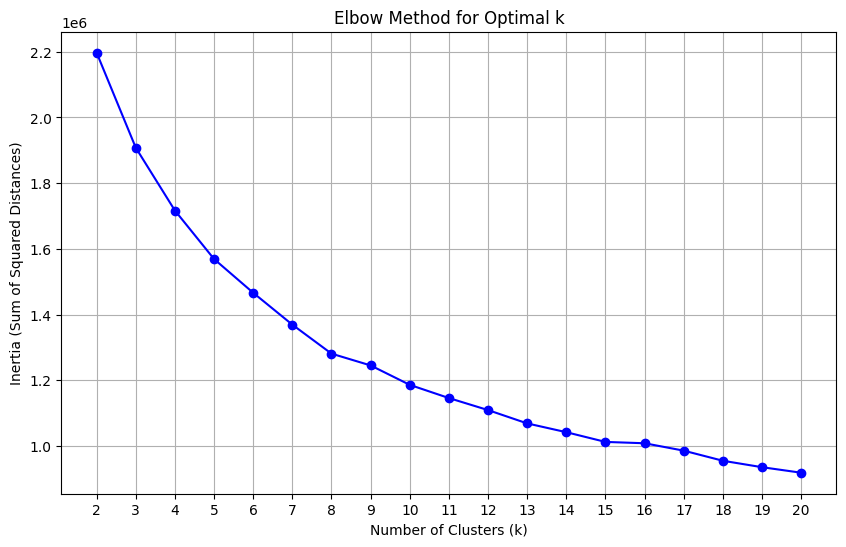

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                    'SugarContent', 'ProteinContent']

# Ensure the nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in nutrient columns
df.dropna(subset=nutrient_columns, inplace=True)

# Extract features (X)
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply the Elbow Method with k from 2 to 20
inertia = []  # List to store the sum of squared distances (inertia) for each number of clusters
cluster_range = range(2, 21)  # Set the range from 2 to 20

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot the inertia to visualize the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


cluster=5

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

# Select nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                    'SugarContent', 'ProteinContent']

# Ensure the nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in nutrient columns
df.dropna(subset=nutrient_columns, inplace=True)

# Split the data into features (X)
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train the KMeans model using KMeans++ initialization
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)  # You can choose the number of clusters
kmeans.fit(X_train)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# Predict cluster labels for the test set
y_pred = kmeans.predict(X_test)

# Evaluate the model's performance using silhouette score
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score: {silhouette_avg:.4f}')

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score # import the relevant metrics

# ... (your existing code) ...

# Predict cluster labels for the test set
y_pred = kmeans.predict(X_test)

# Evaluate the model's performance using silhouette score and adjusted rand index
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Adjusted Rand Index (ARI) for comparing cluster assignments
# Assuming you have ground truth labels (y_true),
# if not, skip this part or use other internal validation metrics.
# ari_score = adjusted_rand_score(y_true, y_pred) # Assuming you have true labels
# print(f'Adjusted Rand Index: {ari_score:.4f}')

Silhouette Score: 0.1900


In [ ]:
# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.predict(scaler.transform(df[nutrient_columns]))

In [ ]:
# Save the KMeans model
joblib.dump(kmeans, '/content/drive/MyDrive/diet_data/kmeans_model_diet.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/diet_data/scaler_diet.pkl')  # Save the scaler as well for future use

# Optionally, save the updated DataFrame with cluster labels
df.to_csv('/content/drive/MyDrive/diet_data/recipes_clusters_diet.csv', index=False)

In [ ]:
# Example: Function to recommend recipes based on cluster
def recommend_recipes_by_cluster(df, cluster_number, num_recommendations=3):
    recommended_recipes = df[df['Cluster'] == cluster_number].sample(num_recommendations)
    return recommended_recipes[['Name', 'Cluster']]

# Example usage
cluster_number_to_recommend = 0  # Change this to the desired cluster number
recommended_recipes = recommend_recipes_by_cluster(df, cluster_number_to_recommend)
print("\nRecommended Recipes for Cluster", cluster_number_to_recommend)
print(recommended_recipes)


Recommended Recipes for Cluster 0
                                                  Name  Cluster
189290                     Easy Snacker Tortilla Pizza        0
274369                    Sun-Dried Tomato Lamb Shanks        0
250170  Steak and Kidney Casserole With Mustard Toasts        0


In [ ]:
from sklearn.metrics import precision_score
from scipy.stats import mode
import numpy as np

def cluster_precision(true_labels, predicted_clusters):
    # Find the unique clusters and classes
    unique_clusters = np.unique(predicted_clusters)

    # Create an array to store the assigned class for each cluster
    cluster_class_assignment = {}

    # For each cluster, assign the most common true label
    for cluster in unique_clusters:
        # Get the true labels for data points in this cluster
        cluster_true_labels = true_labels[predicted_clusters == cluster]
        # Assign the most common label in this cluster
        assigned_class = mode(cluster_true_labels).mode[0]
        cluster_class_assignment[cluster] = assigned_class

    # Map each cluster prediction to its assigned class
    predicted_labels = np.array([cluster_class_assignment[cluster] for cluster in predicted_clusters])

    # Calculate precision
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    return precision

# Example usage
# Assuming `true_labels` is the true label array and `predicted_clusters` is the cluster label array from KMeans
precision = cluster_precision(true_labels, predicted_clusters)
print(f'Precision of KMeans Clustering: {precision:.4f}')


CLUSTER=4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

# Select nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                    'SugarContent', 'ProteinContent']

# Ensure the nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in nutrient columns
df.dropna(subset=nutrient_columns, inplace=True)

# Split the data into features (X)
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train the KMeans model using KMeans++ initialization
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)  # You can choose the number of clusters
kmeans.fit(X_train)

# Predict cluster labels for the test set
y_pred = kmeans.predict(X_test)

# Evaluate the model's performance using silhouette score
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.predict(scaler.transform(df[nutrient_columns]))

# Save the KMeans model
joblib.dump(kmeans, '/content/drive/MyDrive/diet_data/kmeans_model_new.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/diet_data/scaler_new.pkl')  # Save the scaler as well for future use

# Optionally, save the updated DataFrame with cluster labels
df.to_csv('/content/drive/MyDrive/diet_data/recipes_clusters_new.csv', index=False)

# Example: Function to recommend recipes based on cluster
def recommend_recipes_by_cluster(df, cluster_number, num_recommendations=3):
    recommended_recipes = df[df['Cluster'] == cluster_number].sample(num_recommendations)
    return recommended_recipes[['Name', 'Cluster']]

# Example usage
cluster_number_to_recommend = 0  # Change this to the desired cluster number
recommended_recipes = recommend_recipes_by_cluster(df, cluster_number_to_recommend)
print("\nRecommended Recipes for Cluster", cluster_number_to_recommend)
print(recommended_recipes)

Silhouette Score: 0.2152

Recommended Recipes for Cluster 0
                             Name  Cluster
148418           Feta Cheese Ball        0
30307   Barbecued Pork Sandwiches        0
200824           Carne En Su Jugo        0


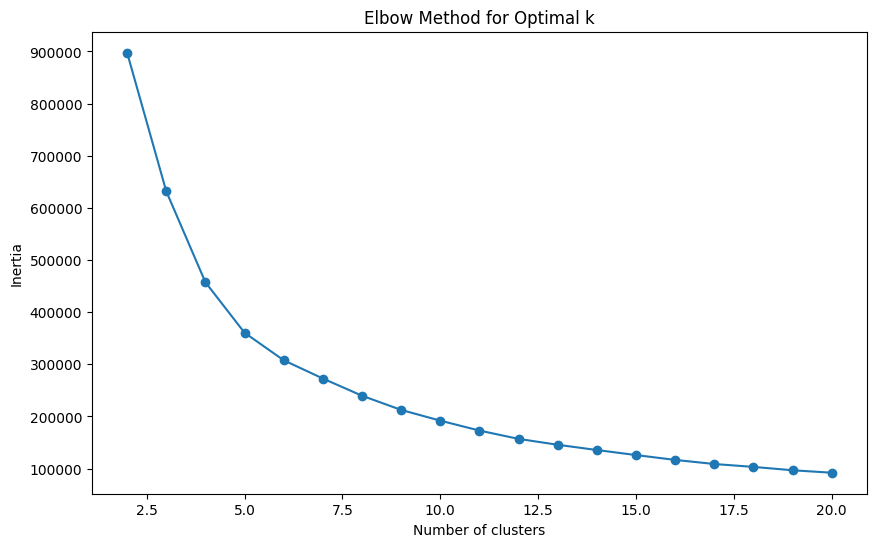

Silhouette Score after PCA: 0.4170

Recommended Recipes for Cluster 0
                                       Name  Cluster
195068             Pimento Cheese Cornbread        0
64929                      Tender Meltaways        0
302396  Pears Draped in Honey Vanilla Cream        0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
import matplotlib.pyplot as plt

# Define nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent', 'SodiumContent',
                    'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

# Ensure nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=nutrient_columns, inplace=True)  # Drop rows with NaNs in these columns

# Separate features
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for easier visualization
X_pca = pca.fit_transform(X_scaled)

# Elbow method to find optimal number of clusters
inertia = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Train the KMeans model with the optimal number of clusters, e.g., k=5
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_pca)

# Predict cluster labels
df['Cluster'] = kmeans.predict(X_pca)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca, df['Cluster'])
print(f'Silhouette Score after PCA: {silhouette_avg:.4f}')

# Save the KMeans model, PCA transformer, and scaler for future use
joblib.dump(kmeans, '/content/drive/MyDrive/diet_data/kmeans_model_pca.pkl')
joblib.dump(pca, '/content/drive/MyDrive/diet_data/pca_transformer.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/diet_data/scaler_new.pkl')

# Example: Function to recommend recipes by cluster
def recommend_recipes_by_cluster(df, cluster_number, num_recommendations=3):
    recommended_recipes = df[df['Cluster'] == cluster_number].sample(num_recommendations)
    return recommended_recipes[['Name', 'Cluster']]

# Example usage
cluster_number_to_recommend = 0
recommended_recipes = recommend_recipes_by_cluster(df, cluster_number_to_recommend)
print("\nRecommended Recipes for Cluster", cluster_number_to_recommend)
print(recommended_recipes)


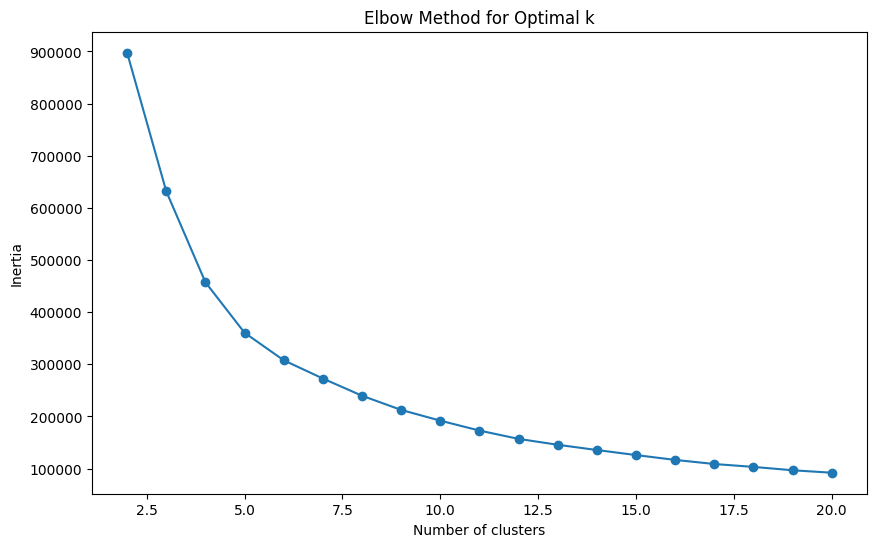

Silhouette Score after PCA: 0.3887

Recommended Recipes for Cluster 0
                                                     Name  Cluster
287314  Ladur&eacute;e Macaron Recipe With Chocolate R...        0
10267                               Maia's Carrot Muffins        0
99495                                       Pizza Wontons        0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
import matplotlib.pyplot as plt

# Define nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent', 'SodiumContent',
                    'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

# Ensure nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=nutrient_columns, inplace=True)  # Drop rows with NaNs in these columns

# Separate features
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for easier visualization
X_pca = pca.fit_transform(X_scaled)

# Elbow method to find optimal number of clusters
inertia = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Train the KMeans model with the optimal number of clusters, e.g., k=5
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_pca)

# Predict cluster labels
df['Cluster'] = kmeans.predict(X_pca)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca, df['Cluster'])
print(f'Silhouette Score after PCA: {silhouette_avg:.4f}')

# # Save the KMeans model, PCA transformer, and scaler for future use
# joblib.dump(kmeans, '/content/drive/MyDrive/diet_data/kmeans_model_pca.pkl')
# joblib.dump(pca, '/content/drive/MyDrive/diet_data/pca_transformer.pkl')
# joblib.dump(scaler, '/content/drive/MyDrive/diet_data/scaler_new.pkl')

# Example: Function to recommend recipes by cluster
def recommend_recipes_by_cluster(df, cluster_number, num_recommendations=3):
    recommended_recipes = df[df['Cluster'] == cluster_number].sample(num_recommendations)
    return recommended_recipes[['Name', 'Cluster']]

# Example usage
cluster_number_to_recommend = 0
recommended_recipes = recommend_recipes_by_cluster(df, cluster_number_to_recommend)
print("\nRecommended Recipes for Cluster", cluster_number_to_recommend)
print(recommended_recipes)


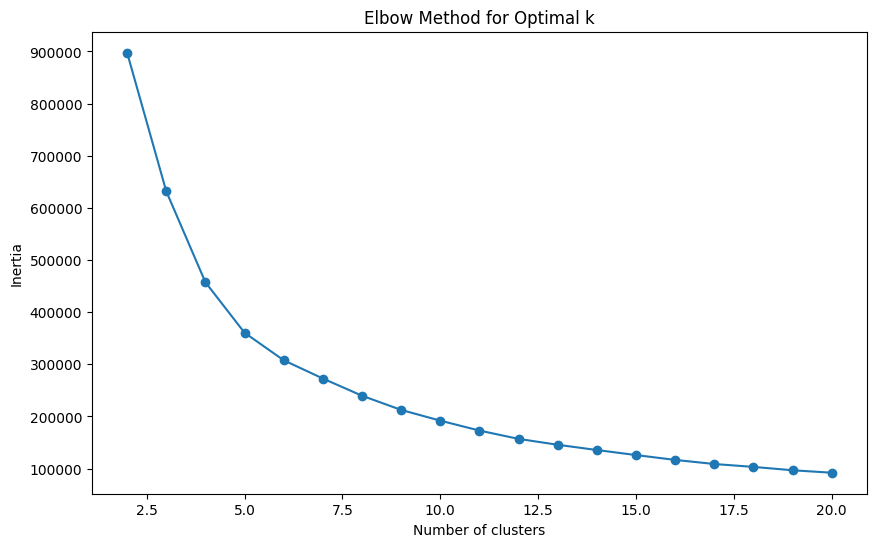

Silhouette Score after PCA: 0.3812

Recommended Recipes for Cluster 0
                                                Name  Cluster
292396                            Cranberry Focaccia        0
182321  BLT Lettuce Wraps- South Beach Diet Inspired        0
216493                               Orange Smoothie        0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
import matplotlib.pyplot as plt

# Define nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent', 'SodiumContent',
                    'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

# Ensure nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=nutrient_columns, inplace=True)  # Drop rows with NaNs in these columns

# Separate features
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for easier visualization
X_pca = pca.fit_transform(X_scaled)

# Elbow method to find optimal number of clusters
inertia = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Train the KMeans model with the optimal number of clusters, e.g., k=5
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(X_pca)

# Predict cluster labels
df['Cluster'] = kmeans.predict(X_pca)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca, df['Cluster'])
print(f'Silhouette Score after PCA: {silhouette_avg:.4f}')

# # Save the KMeans model, PCA transformer, and scaler for future use
# joblib.dump(kmeans, '/content/drive/MyDrive/diet_data/kmeans_model_pca.pkl')
# joblib.dump(pca, '/content/drive/MyDrive/diet_data/pca_transformer.pkl')
# joblib.dump(scaler, '/content/drive/MyDrive/diet_data/scaler_new.pkl')

# Example: Function to recommend recipes by cluster
def recommend_recipes_by_cluster(df, cluster_number, num_recommendations=3):
    recommended_recipes = df[df['Cluster'] == cluster_number].sample(num_recommendations)
    return recommended_recipes[['Name', 'Cluster']]

# Example usage
cluster_number_to_recommend = 0
recommended_recipes = recommend_recipes_by_cluster(df, cluster_number_to_recommend)
print("\nRecommended Recipes for Cluster", cluster_number_to_recommend)
print(recommended_recipes)



In [ ]:
import pandas as pd
import joblib

# Load the pre-trained KMeans model and scaler
kmeans_model = joblib.load('/content/drive/MyDrive/kmeans_model_new.pkl')
scaler = joblib.load('/content/drive/MyDrive/scaler_new.pkl')

# Load the recipes DataFrame
df = pd.read_csv('/content/drive/MyDrive/recipes_clusters_new.csv')

def recommend_recipes(nutrient_ranges):
    # Define a mapping for nutrient ranges to numerical values
    nutrient_mapping = {
        'low': 1,
        'medium': 2,
        'high': 3,
        'very high': 4
    }

    # Extract nutrient values from nutrient_ranges dictionary and map to numerical values
    user_nutrients = {
        'Calories': nutrient_mapping.get(nutrient_ranges['Calories']),
        'FatContent': nutrient_mapping.get(nutrient_ranges['FatContent']),
        'CholesterolContent': nutrient_mapping.get(nutrient_ranges['CholesterolContent']),
        'SodiumContent': nutrient_mapping.get(nutrient_ranges['SodiumContent']),
        'CarbohydrateContent': nutrient_mapping.get(nutrient_ranges['CarbohydrateContent']),
        'FiberContent': nutrient_mapping.get(nutrient_ranges['FiberContent']),
        'SugarContent': nutrient_mapping.get(nutrient_ranges['SugarContent']),
        'ProteinContent': nutrient_mapping.get(nutrient_ranges['ProteinContent'])
    }

    # Convert user nutrients to DataFrame with correct column names
    user_nutrients_df = pd.DataFrame([user_nutrients])

    # Scale the user nutrient data
    user_nutrients_scaled = scaler.transform(user_nutrients_df)

    # Predict the cluster for the user input
    cluster_label = kmeans_model.predict(user_nutrients_scaled)[0]

    # Recommend recipes from the predicted cluster
    recommended_recipes = df[df['Cluster'] == cluster_label].sample(n=3)

    return recommended_recipes[['Name', 'Cluster']]

# Function to get user input for nutrient ranges
def get_user_input():
    nutrient_ranges = {}
    nutrient_labels = ['Calories', 'FatContent', 'CholesterolContent',
                       'SodiumContent', 'CarbohydrateContent',
                       'FiberContent', 'SugarContent', 'ProteinContent']

    print("Please enter the nutrient ranges (low, medium, high, very high):")
    for nutrient in nutrient_labels:
        while True:
            value = input(f"{nutrient}: ").strip().lower()
            if value in ['low', 'medium', 'high', 'very high']:
                nutrient_ranges[nutrient] = value
                break
            else:
                print("Invalid input. Please enter one of: low, medium, high, very high.")

    return nutrient_ranges

# Get user input for nutrient ranges
user_input = get_user_input()

# Recommend recipes based on user input
recommended_recipes = recommend_recipes(user_input)

# Display the recommended recipes
print("\nRecommended Recipes based on your nutrient ranges:")
print(recommended_recipes)


Please enter the nutrient ranges (low, medium, high, very high):
Calories: low
FatContent: low
CholesterolContent: low
SodiumContent: low
CarbohydrateContent: low
FiberContent: low
SugarContent: low
ProteinContent: low

Recommended Recipes based on your nutrient ranges:
                                                   Name  Cluster
10853                            Special Scottish Swede        1
347899  Baked Dairy Free Gluten Free Donuts (Chocolate)        1
210228                                    Hello Dollies        1


ok

cluster=5 score=19

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib


# Select nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent']

# Ensure the nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in nutrient columns
df.dropna(subset=nutrient_columns, inplace=True)

# Split the data into features (X) and target (y if needed)
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)  # You can choose the number of clusters
kmeans.fit(X_train)

# Predict cluster labels for the test set
y_pred = kmeans.predict(X_test)

# Evaluate the model's performance using silhouette score
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.predict(scaler.transform(df[nutrient_columns]))

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler as well for future use

# Optionally, save the updated DataFrame with cluster labels
df.to_csv('recipes_data_with_clusters.csv', index=False)

# Example: Function to recommend recipes based on cluster
def recommend_recipes_by_cluster(df, cluster_number, num_recommendations=3):
    recommended_recipes = df[df['Cluster'] == cluster_number].sample(num_recommendations)
    return recommended_recipes[['Name', 'Cluster']]

# Example usage
cluster_number_to_recommend = 0  # Change this to the desired cluster number
recommended_recipes = recommend_recipes_by_cluster(df, cluster_number_to_recommend)
print("\nRecommended Recipes for Cluster", cluster_number_to_recommend)
print(recommended_recipes)

Silhouette Score: 0.1900

Recommended Recipes for Cluster 0
                                      Name  Cluster
85200  Ez Asian Chicken or Turkey Stir Fry        0
76596                   Eggnog Quick Bread        0
37036                 Pork Chops Casserole        0


In [ ]:
import joblib
import pickle

# Save using joblib - use 'kmeans' instead of 'model'
joblib.dump(kmeans, '/content/drive/MyDrive/diet_data/kmeans_model.pkl')

# Or save using pickle - use 'kmeans' instead of 'model'
with open('/content/drive/MyDrive/diet_data/kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [ ]:
import joblib
# Replace 'MyDrive' with the specific folder where you want to save it
joblib.dump(scaler, '/content/drive/MyDrive/diet_data/scaler.pkl')


['/content/drive/MyDrive/diet_data/scaler.pkl']

In [ ]:
import pandas as pd
import joblib

# Load the pre-trained KMeans model and scaler
kmeans_model = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the recipes DataFrame
df = pd.read_csv('recipes_data_with_clusters.csv')

def recommend_recipes(nutrient_ranges):
    # Define a mapping for nutrient ranges to numerical values
    nutrient_mapping = {
        'low': 1,
        'medium': 2,
        'high': 3,
        'very high': 4
    }

    # Extract nutrient values from nutrient_ranges dictionary and map to numerical values
    user_nutrients = {
        'Calories': nutrient_mapping.get(nutrient_ranges['Calories']),
        'FatContent': nutrient_mapping.get(nutrient_ranges['FatContent']),
        'CholesterolContent': nutrient_mapping.get(nutrient_ranges['CholesterolContent']),
        'SodiumContent': nutrient_mapping.get(nutrient_ranges['SodiumContent']),
        'CarbohydrateContent': nutrient_mapping.get(nutrient_ranges['CarbohydrateContent']),
        'FiberContent': nutrient_mapping.get(nutrient_ranges['FiberContent']),
        'SugarContent': nutrient_mapping.get(nutrient_ranges['SugarContent']),
        'ProteinContent': nutrient_mapping.get(nutrient_ranges['ProteinContent'])
    }

    # Convert user nutrients to DataFrame with correct column names
    user_nutrients_df = pd.DataFrame([user_nutrients])

    # Scale the user nutrient data
    user_nutrients_scaled = scaler.transform(user_nutrients_df)

    # Predict the cluster for the user input
    cluster_label = kmeans_model.predict(user_nutrients_scaled)[0]

    # Recommend recipes from the predicted cluster
    recommended_recipes = df[df['Cluster'] == cluster_label].sample(n=3)

    return recommended_recipes[['Name', 'Cluster']]

# Function to get user input for nutrient ranges
def get_user_input():
    nutrient_ranges = {}
    nutrient_labels = ['Calories', 'FatContent', 'CholesterolContent',
                       'SodiumContent', 'CarbohydrateContent',
                       'FiberContent', 'SugarContent', 'ProteinContent']

    print("Please enter the nutrient ranges (low, medium, high, very high):")
    for nutrient in nutrient_labels:
        while True:
            value = input(f"{nutrient}: ").strip().lower()
            if value in ['low', 'medium', 'high', 'very high']:
                nutrient_ranges[nutrient] = value
                break
            else:
                print("Invalid input. Please enter one of: low, medium, high, very high.")

    return nutrient_ranges

# Get user input for nutrient ranges
user_input = get_user_input()

# Recommend recipes based on user input
recommended_recipes = recommend_recipes(user_input)

# Display the recommended recipes
print("\nRecommended Recipes based on your nutrient ranges:")
print(recommended_recipes)


Please enter the nutrient ranges (low, medium, high, very high):
Calories: high
FatContent: low
CholesterolContent: high
SodiumContent: low
CarbohydrateContent: medium
FiberContent: high
SugarContent: low
ProteinContent: low

Recommended Recipes based on your nutrient ranges:
                                  Name  Cluster
345988       Smothered Shrimp Burritos        2
372746  Nanni's Chocolate Chip Cookies        2
9901           Zucchini Chocolate Cake        2


or

cluster=20 score =18

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib


# Select nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent']

# Ensure the nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in nutrient columns
df.dropna(subset=nutrient_columns, inplace=True)

# Split the data into features (X) and target (y if needed)
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train the KMeans model
kmeans = KMeans(n_clusters=20, random_state=42)  # You can choose the number of clusters
kmeans.fit(X_train)

# Predict cluster labels for the test set
y_pred = kmeans.predict(X_test)

# Evaluate the model's performance using silhouette score
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.predict(scaler.transform(df[nutrient_columns]))

# Save the KMeans model
joblib.dump(kmeans, '/content/drive/MyDrive/kmeans_fir_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/scaler_fir.pkl')  # Save the scaler as well for future use

# Optionally, save the updated DataFrame with cluster labels
# df.to_csv('recipes_data_with_clusters.csv', index=False)

# Example: Function to recommend recipes based on cluster
def recommend_recipes_by_cluster(df, cluster_number, num_recommendations=3):
    recommended_recipes = df[df['Cluster'] == cluster_number].sample(num_recommendations)
    return recommended_recipes[['Name', 'Cluster']]

# Example usage
cluster_number_to_recommend = 0  # Change this to the desired cluster number
recommended_recipes = recommend_recipes_by_cluster(df, cluster_number_to_recommend)
print("\nRecommended Recipes for Cluster", cluster_number_to_recommend)
print(recommended_recipes)



Silhouette Score: 0.1898

Recommended Recipes for Cluster 0
                                                Name  Cluster
224324                    Jasper Lodge Voyageur Stew        0
339948  Sweet &amp; Spicy Glazed Buttermilk Meatloaf        0
314733                         Polynesian Pork Chops        0


rf